import libraires
load iris dataset
initlaize the decison tree classfier with gini impurity criteion
preform kfold cross validation
plot the decision tree
    print the splitting criteria
print classification report
print confusion matrix



In [11]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict,KFold,train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree
from sklearn import metrics

In [2]:
#loading the dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_train,y_train,X_test,y_test = train_test_split(X,y ,train_size=0.3,random_state=42)

In [4]:
# Initialize the DecisionTreeClassifier with Gini impurity criterion
clf = DecisionTreeClassifier(criterion="gini")



In [5]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)

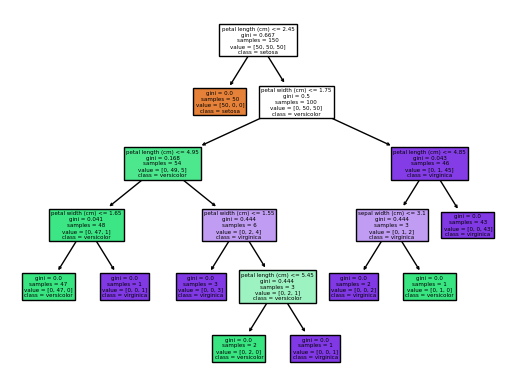

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)
tree.plot_tree(clf,filled=True,feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [7]:
for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print(f"Fold {fold_idx + 1}:")
print(f"  Training samples: {len(X_train)}")
print(f"  Test samples: {len(X_test)}")

y_pred_test = cross_val_predict(clf, X_test, y_test, cv=5)
conf_mat = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

Fold 6:
  Training samples: 125
  Test samples: 25


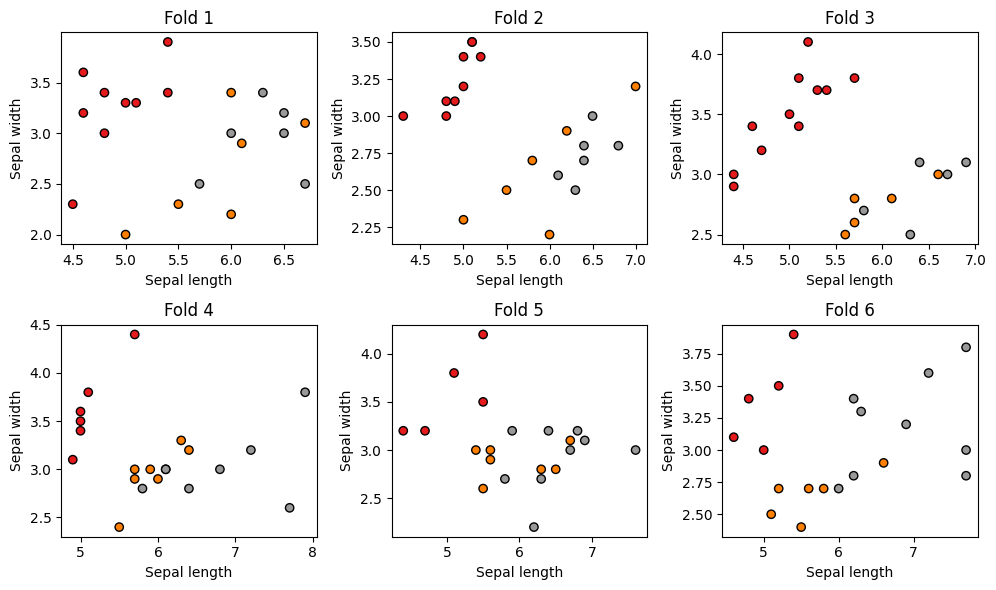

In [8]:
plt.figure(figsize=(10, 6))
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]
    
    clf.fit(X_train_kf, y_train_kf)
    y_pred_kf = clf.predict(X_val_kf)
    
    plt.subplot(2, 3, i+1)
    plt.scatter(X_val_kf[:, 0], X_val_kf[:, 1], c=y_pred_kf, cmap=plt.cm.Set1, edgecolor='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(f'Fold {i+1}')

plt.tight_layout()
plt.show()


In [9]:
# Generate and print the classification report

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


print("Classification Report:")
print(classification_report(y_test, y_pred_test, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       0.88      0.88      0.88         8
   virginica       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.93      0.93        25
weighted avg       0.92      0.92      0.92        25



In [10]:
print("Confusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(class_report)



Confusion Matrix:
[[ 5  0  0]
 [ 0  7  1]
 [ 0  1 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.93      0.93        25
weighted avg       0.92      0.92      0.92        25

